In [ ]:
Pergunta: Qual é a relação existente do crescimento urbano e taxa de emprego com o IDH de um país? 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

idh = pd.read_excel('hdi_human_development_index.xlsx')
emprego = pd.read_excel('aged_15_24_employment_rate_percent.xlsx')
crescimento = pd.read_excel('urban_population_growth_annual_percent.xlsx')

In [3]:
idh.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [4]:
emprego.head()

,geo,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,50.4,50.2,50.4,50.0,50.0,50.0,50.1,50.1,50.1,50.2,50.8,50.6,47.8,50.0,45.9,48.8,48.0
1,Albania,38.9,38.5,38.6,38.8,38.8,38.2,38.4,38.1,37.7,37.4,37.0,36.8,36.4,35.9,35.5,35.2,35.6
2,Algeria,25.4,24.7,25.2,25.1,23.7,24.6,25.3,24.8,24.3,23.2,24.9,25.7,26.9,31.0,32.5,34.8,34.0
3,Angola,69.1,68.5,69.0,68.9,69.9,69.9,69.5,69.1,68.9,68.9,68.8,68.7,68.4,68.3,68.1,67.5,67.7
4,Argentina,42.9,43.3,43.3,43.8,43.5,44.0,44.0,43.3,42.3,42.2,41.3,40.0,41.3,40.7,40.0,39.4,39.0


In [5]:
crescimento.head()

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,5.26,5.31,5.37,5.40,5.46,5.48,5.51,5.51,5.57,...,4.25,4.020,4.090,4.350,4.64,4.83,4.89,4.76,4.53,4.28
1,Albania,5.39,3.89,3.29,3.18,3.11,2.98,2.86,2.86,3.07,...,1.49,1.440,1.470,1.610,1.79,1.85,1.74,1.63,1.46,1.51
2,Algeria,5.52,6.62,6.83,6.76,6.74,6.73,5.89,3.26,3.30,...,2.70,2.760,2.810,2.870,2.93,2.97,2.96,2.89,2.77,2.64
3,Andorra,10.50,11.20,10.70,10.30,9.72,9.23,8.75,8.29,7.88,...,1.54,0.858,0.133,-0.622,-1.47,-2.22,-2.64,-2.58,-2.14,-1.54
4,Angola,5.07,5.35,5.64,5.61,5.54,5.42,5.32,5.26,5.27,...,5.65,5.630,5.600,5.580,5.55,5.49,5.41,5.31,5.21,5.10


In [6]:
idh_2007 = idh.loc[:, ['geo',2007]]

In [13]:
emprego_2007 = emprego.loc[:, ['geo',2007]]

In [14]:
crescimento_2007 = crescimento.loc[:, ['geo',2007]]

In [15]:
idh_idx = idh_2007.set_index('geo')

In [17]:
emprego_idx = emprego_2007.set_index('geo')

In [18]:
crescimento_idx = crescimento_2007.set_index('geo')

In [22]:
idh_idx.head()

,2007
geo,
Afghanistan,0.433
Albania,0.713
Algeria,0.697
Andorra,NaN
Angola,0.468


In [23]:
emprego_idx.head()

,2007
geo,
Afghanistan,48.0
Albania,35.6
Algeria,34.0
Angola,67.7
Argentina,39.0


In [24]:
crescimento_idx.head()

,2007
geo,
Afghanistan,4.25
Albania,1.49
Algeria,2.70
Andorra,1.54
Angola,5.65


In [25]:
df = idh_idx.join(emprego_idx, how='inner', lsuffix='_idh', rsuffix='_empl')
df.head()

,2007_idh,2007_empl
geo,,
Afghanistan,0.433,48.0
Albania,0.713,35.6
Algeria,0.697,34.0
Angola,0.468,67.7
Argentina,0.792,39.0


In [33]:
data = df.join(crescimento_idx, how='inner')
data.rename(columns = {2007:'2007_urb_grw'}, inplace = True)

In [34]:
data.head(10)

,2007_idh,2007_empl,2007_urb_grw
geo,,,
Afghanistan,0.433,48.0,4.250
Albania,0.713,35.6,1.490
Algeria,0.697,34.0,2.700
Angola,0.468,67.7,5.650
Argentina,0.792,39.0,1.230
Armenia,0.721,25.6,-0.915
Australia,0.921,64.3,0.792
Austria,0.864,52.5,0.333
Azerbaijan,0.719,39.2,1.520


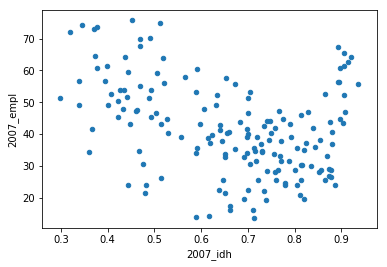

In [37]:
data.plot.scatter(x = '2007_idh', y = '2007_empl') 

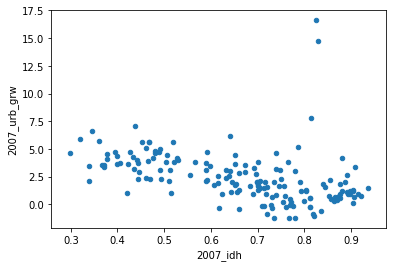

In [39]:
data.plot.scatter(x = '2007_idh', y = '2007_urb_grw')